# task 3 

Request :
Following the previous request, some company managers are afraid that discounting will reduce profit, so they have asked you to check the effect of discounting on the amount of profit and if there is such an effect, describe it.
solution :
To determine if discounts have a significant effect on profit, you can perform hypothesis testing. You may use a t-test or ANOVA to compare the profitability of products or time periods with and without discounts. For example, you might compare the average profit of discounted sales to non-discounted sales.

In [14]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [15]:
# connect to data base 
from sqlalchemy import create_engine, Column, Integer, String, MetaData, Table

# Initialize SQLAlchemy Metadata object
meta = MetaData()
# Define database connection details
USERNAME = 'root'
PASSWORD = '1393ram1393#$'
SERVER = 'localhost'
# Create a SQLAlchemy engine for connecting to the MySQL database
engine = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{SERVER}:3306/Laptop_analysis_and_Warehousing_g3', echo=True)
conn = engine.connect()

2023-10-29 13:21:49,545 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-10-29 13:21:49,545 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-29 13:21:49,546 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-10-29 13:21:49,546 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-29 13:21:49,547 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-10-29 13:21:49,547 INFO sqlalchemy.engine.Engine [raw sql] {}


In [16]:
metadata = MetaData()

# Replace "your_table_name" with the name of your table
table_name = "order"

your_table = Table(table_name, metadata, autoload=True, autoload_with=engine)


2023-10-29 13:21:49,555 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `order`
2023-10-29 13:21:49,555 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-29 13:21:49,561 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%(table_data_1_1)s, %(table_data_1_2)s, %(table_data_1_3)s));
                
2023-10-29 13:21:49,561 INFO sqlalchemy.engine.Engine [generated in 0.00061s] {'table_data_1_1': 'laptop_analysis_and_warehousing_g3', 'table_data_1_2': 'laptop', 'table_data_1_3': 'laptop_id'}
2023-10-29 13:21:49,564 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `laptop`
2023-10-29 13:21:49,565 INFO sqlalchemy.engine.Engine [raw sql] {}


In [17]:
# Define the columns you want to read
from sqlalchemy.orm import sessionmaker

# Initialize SQLAlchemy session
Session = sessionmaker(bind=engine)

# Assuming you have a session and SQLAlchemy model defined as mentioned before
session = Session()

# Define the columns you want to read
Price = your_table.c.Total_Price
Discount = your_table.c.Discount
Profit = your_table.c.Profit
Quantity = your_table.c.Quantity

# Query the database to fetch the data for the specified columns
results = session.query(Price, Discount, Profit, Quantity).all()

# Convert the results to a Pandas DataFrame
data = [(row[0], row[1], row[2], row[3]) for row in results]
df_order = pd.DataFrame(data, columns=["Price", "Discount", "Profit", "Quantity"])
df_order

2023-10-29 13:21:49,573 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-10-29 13:21:49,574 INFO sqlalchemy.engine.Engine SELECT `order`.`Total_Price` AS `order_Total_Price`, `order`.`Discount` AS `order_Discount`, `order`.`Profit` AS `order_Profit`, `order`.`Quantity` AS `order_Quantity` 
FROM `order`
2023-10-29 13:21:49,575 INFO sqlalchemy.engine.Engine [generated in 0.00067s] {}


,Price,Discount,Profit,Quantity
0,3450000.0,0,250000.0,1
1,1100000.0,0,100000.0,1
2,15580000.0,5,1920000.0,1
3,20150000.0,0,2170000.0,1
4,4250000.0,0,430000.0,1
...,...,...,...,...
1017076,1150000.0,0,80000.0,1
1017077,1350000.0,0,130000.0,1
1017078,15150000.0,0,1680000.0,1
1017079,8950000.0,0,1140000.0,1


In [18]:
# close the session of database 
session.close()

2023-10-29 13:21:57,666 INFO sqlalchemy.engine.Engine ROLLBACK


In [19]:
df_order

,Price,Discount,Profit,Quantity
0,3450000.0,0,250000.0,1
1,1100000.0,0,100000.0,1
2,15580000.0,5,1920000.0,1
3,20150000.0,0,2170000.0,1
4,4250000.0,0,430000.0,1
...,...,...,...,...
1017076,1150000.0,0,80000.0,1
1017077,1350000.0,0,130000.0,1
1017078,15150000.0,0,1680000.0,1
1017079,8950000.0,0,1140000.0,1


In [20]:
# Split the DataFrame based on 'column_name'
value_to_split_on = 0  # Change this to the desired value
non_discounted_sales = df_order[df_order['Discount'] <= value_to_split_on]
discounted_sales = df_order[df_order['Discount'] > value_to_split_on]


In [21]:
non_discounted_sales

,Price,Discount,Profit,Quantity
0,3450000.0,0,250000.0,1
1,1100000.0,0,100000.0,1
3,20150000.0,0,2170000.0,1
4,4250000.0,0,430000.0,1
5,2400000.0,0,260000.0,1
...,...,...,...,...
1017076,1150000.0,0,80000.0,1
1017077,1350000.0,0,130000.0,1
1017078,15150000.0,0,1680000.0,1
1017079,8950000.0,0,1140000.0,1


In [22]:
discounted_sales

,Price,Discount,Profit,Quantity
2,15580000.0,5,1920000.0,1
10,3895000.0,5,370000.0,2
17,1568000.0,2,170000.0,1
24,2232500.0,5,200000.0,1
26,21476000.0,9,1750000.0,1
...,...,...,...,...
1017044,1092500.0,5,100000.0,1
1017046,10450000.0,5,990000.0,1
1017048,980000.0,2,100000.0,1
1017052,1282500.0,5,130000.0,1


In [23]:
# Calculate the average profit for each group
non_discounted_avg_profit = non_discounted_sales['Profit'].mean()
discounted_avg_profit = discounted_sales['Profit'].mean()
print(f'non_discounted_avg_profit :{non_discounted_avg_profit}')
print(f'discounted_avg_profit :{discounted_avg_profit}')

non_discounted_avg_profit :1450280.334238882
discounted_avg_profit :1388568.704782302


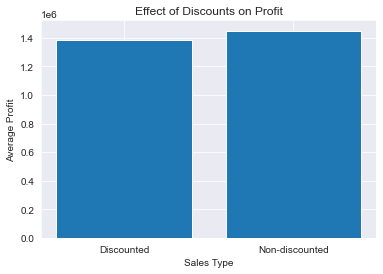

In [35]:
import matplotlib.pyplot as plt

# Example data visualization (replace with your data)
plt.bar(['Discounted', 'Non-discounted'], [discounted_avg_profit, non_discounted_avg_profit])
plt.xlabel("Sales Type")
plt.ylabel("Average Profit")
plt.title("Effect of Discounts on Profit")
plt.show()


In [24]:
# Perform the t-test on the two groups discounted and non-discounted based on the  profit
t_stat, p_value = stats.ttest_ind(discounted_sales['Profit'], non_discounted_sales['Profit'])
# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: -11.752077215107551
P-Value: 6.923241565492666e-32


In [25]:
# Check the assumptions
# Assumption 1: Independence of Observations
# Nothing to code here; it's assumed based on the data structure.
'''Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.
'''

'Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.\n'

C:\Users\parham\.conda\envs\quera_bootcamp\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


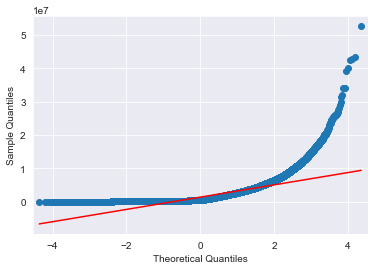

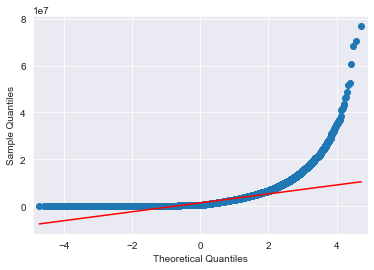

In [26]:
# Assumption 2: Normality
# Check normality using Q-Q plots and Shapiro-Wilk test
'''Normality: The data in each group should follow a roughly normal distribution. Normality is important because the t-test assumes that the sampling distribution of the means is normally distributed. You can check for normality using methods like histograms, Q-Q plots, or formal statistical tests (e.g., Shapiro-Wilk test).
'''
qqplot_column1 = sm.qqplot(discounted_sales['Profit'], line='s')
qqplot_column2 = sm.qqplot(non_discounted_sales['Profit'], line='s')
shapiro_column1 = stats.shapiro(discounted_sales['Profit'])
shapiro_column2 = stats.shapiro(non_discounted_sales['Profit'])


In [27]:
# Assumption 3: Homogeneity of Variance
# Check homoscedasticity using Levene's test
'''Homogeneity of Variance: The variances in the different groups being compared should be approximately equal (homoscedasticity). This assumption is important because the t-test assumes that the standard deviations of the two groups are equal. You can check for homogeneity of variance using statistical tests like Levene's test or by examining the spread of data within groups.
'''
levene_test = stats.levene(discounted_sales['Profit'], non_discounted_sales['Profit'])
levene_test

LeveneResult(statistic=95.47708488533304, pvalue=1.499556970544789e-22)

In [28]:
# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: -11.752077215107551
P-Value: 6.923241565492666e-32


In [30]:
# Check and print the results of the assumptions
print(f'Shapiro-Wilk Test - Column 1: W={shapiro_column1[0]}, p={shapiro_column1[1]}')
print(f'Shapiro-Wilk Test - Column 2: W={shapiro_column2[0]}, p={shapiro_column2[1]}')
print(f'Levene Test: W={levene_test[0]}, p={levene_test[1]}')


Shapiro-Wilk Test - Column 1: W=0.6616845726966858, p=0.0
Shapiro-Wilk Test - Column 2: W=0.6703482270240784, p=0.0
Levene Test: W=95.47708488533304, p=1.499556970544789e-22


In [31]:

# Interpret the results
if p_value < 0.05:
    print('The means are significantly different.')
else:
    print('No significant difference found.')


The means are significantly different.


In practical terms, the results of this t-test suggest that there is a statistically significant difference in profit between the two groups (discounted and non-discounted sales). The negative t-statistic implies that, on average, sales with discounts result in lower profits compared to sales without discounts, and the extremely small p-value indicates that this difference is highly unlikely to be due to random variability. Therefore, it is reasonable to conclude that discounts have a significant impact on profit, and the impact is negative, meaning that offering discounts tends to reduce the profitability of sales.


# perform the t-test for quantity of orders discounted and not discounted

In [32]:
# Calculate the average profit for each group
non_discounted_avg_quantity = non_discounted_sales['Quantity'].mean()
discounted_avg_quantity = discounted_sales['Quantity'].mean()
print(f'non_discounted_avg_quantity :{non_discounted_avg_quantity}')
print(f'discounted_avg_quantity :{discounted_avg_quantity}')

non_discounted_avg_quantity :1.1064411244853478
discounted_avg_quantity :1.105427429675869


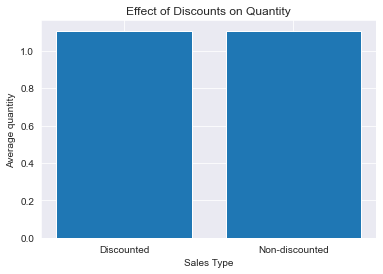

In [33]:

# Example data visualization (replace with your data)
plt.bar(['Discounted', 'Non-discounted'], [discounted_avg_quantity, non_discounted_avg_quantity])
plt.xlabel("Sales Type")
plt.ylabel("Average quantity")
plt.title("Effect of Discounts on Quantity")
plt.show()


In [34]:
# Perform the t-test on the two groups discounted and non-discounted based on the  quantity
t_stat_quantity, p_value_quantity = stats.ttest_ind(discounted_sales['Quantity'], non_discounted_sales['Quantity'])
# Print the results
print(f'T-Statistic: {t_stat_quantity}')
print(f'P-Value: {p_value_quantity}')

T-Statistic: -1.0056762165353774
P-Value: 0.31457158677973424


In [37]:
# Check the assumptions
# Assumption 1: Independence of Observations
# Nothing to code here; it's assumed based on the data structure.
'''Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.
'''

'Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.\n'

C:\Users\parham\.conda\envs\quera_bootcamp\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


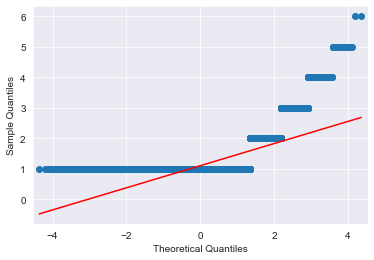

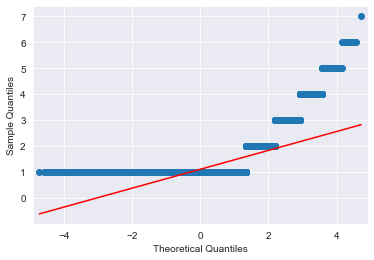

In [39]:
# Assumption 2: Normality
# Check normality using Q-Q plots and Shapiro-Wilk test
'''Normality: The data in each group should follow a roughly normal distribution. Normality is important because the t-test assumes that the sampling distribution of the means is normally distributed. You can check for normality using methods like histograms, Q-Q plots, or formal statistical tests (e.g., Shapiro-Wilk test).
'''
qqplot_column1 = sm.qqplot(discounted_sales['Quantity'], line='s')
qqplot_column2 = sm.qqplot(non_discounted_sales['Quantity'], line='s')
shapiro_column1 = stats.shapiro(discounted_sales['Quantity'])
shapiro_column2 = stats.shapiro(non_discounted_sales['Quantity'])

In [38]:
# Assumption 3: Homogeneity of Variance
# Check homoscedasticity using Levene's test
'''Homogeneity of Variance: The variances in the different groups being compared should be approximately equal (homoscedasticity). This assumption is important because the t-test assumes that the standard deviations of the two groups are equal. You can check for homogeneity of variance using statistical tests like Levene's test or by examining the spread of data within groups.
'''
levene_test = stats.levene(discounted_sales['Quantity'], non_discounted_sales['Quantity'])
levene_test

LeveneResult(statistic=1.0113846525048003, pvalue=0.31457158669720414)

In [40]:
# Check and print the results of the assumptions
print(f'Shapiro-Wilk Test - Column 1: W={shapiro_column1[0]}, p={shapiro_column1[1]}')
print(f'Shapiro-Wilk Test - Column 2: W={shapiro_column2[0]}, p={shapiro_column2[1]}')
print(f'Levene Test: W={levene_test[0]}, p={levene_test[1]}')

Shapiro-Wilk Test - Column 1: W=0.31720709800720215, p=0.0
Shapiro-Wilk Test - Column 2: W=0.31916069984436035, p=0.0
Levene Test: W=1.0113846525048003, p=0.31457158669720414


In [41]:

# Interpret the results
if p_value < 0.05:
    print('The means are significantly different.')
else:
    print('No significant difference found.')

The means are significantly different.


In practical terms, the results of this t-test for 'Quantity' suggest that there isn't strong evidence to conclude that discounts have a significant impact on the quantity of items sold. The t-statistic is close to 0, indicating only a slight difference in means, and the p-value is not very low, suggesting that the difference observed could plausibly be attributed to random variation. Therefore, based on this analysis, it does not appear that discounts have a significant impact on the quantity of items sold.
